<a href="https://colab.research.google.com/github/SophieShin/DeepLearning/blob/main/%5BSSH%5Dlab06_FashionMNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6 Multi-class Classification on FashionMNIST
You will 
- start doing image processing
- run our models on GPUs
- use the `DataLoader()` class to iterate over dataset
- visualise images in the dataset
- train the model in batches
- print training and test accuracies
- perform some transformations on the dataset
- tweak the hyper parameters to help with model performance

**IMPORTANT: Change your runtime type to GPU before continuining.**



In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import torch.optim as optim
import torch.nn as nn

### 0. Set up the device and hyper parameters

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
# Hyperparameters setting
input_size = 784 # 28*28
hidden_size = 32 # can be removed if you prefer to specify this in the model's class itself
num_classes = 10
num_epochs = 5
batch_size = 32
learning_rate = 0.001

### 1. Load the dataset

In [4]:
# import data
train_set = torchvision.datasets.FashionMNIST(root="./", download=True, 
                                              train=True,
                                              transform=transforms.Compose([transforms.ToTensor()]))

test_set = torchvision.datasets.FashionMNIST(root="./", download=False, 
                                              train=False,
                                              transform=transforms.Compose([transforms.ToTensor()]))

# TODO: after downloading, locate the data within your hosted runtime machine in the folder on the left
# Q0. Type 'OK' below if you see a folder called 'FashionMNIST'
# 'OK'

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



### View basic info on training data

In [5]:
print(f'Train set size: {len(train_set)}') # number of samples in training set
print(f'Labels: {train_set.targets}') # displays targets labels for the training data
print(f'Count of each class: {train_set.targets.bincount()}') 

# Q1. Considering the size of the training set and the batch size, how many iterations will there be in each epoch?
# Training set size is 60,000. Therefore there will be 60000/32(1,875) iteration sin each epoch
# Ceilling division(-(-len(train_set//batch_size)) 몫 + 1

# Q2. Is the dataset balanced? Why?
# Yes, all of the 10 classes have equal number of 6000 items. 

Train set size: 60000
Labels: tensor([9, 0, 0,  ..., 3, 0, 5])
Count of each class: tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


In [6]:
60000/32

1875.0

### 2. Use DataLoader to load the datasets
If you get an error when you (re-)run the next code cell, then `restart the runtime` and run all code cells again.

In [7]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size)

In [8]:
# Access the first data sample in the train_set using next(iter())
sample = next(iter(train_set))
print(f'Length: {len(sample)}')
print(f'Type: {type(sample)}')

Length: 2
Type: <class 'tuple'>


In [9]:
temp= iter(train_set)

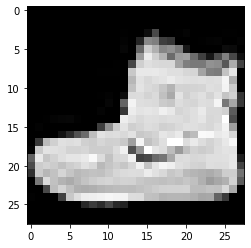

In [10]:
sample2 = next(temp)
image2, label2 = sample2
plt.imshow(image2.squeeze(), cmap = 'gray')

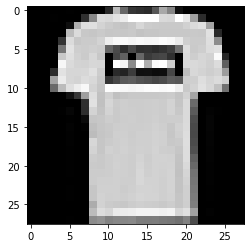

In [11]:
sample3 = next(temp)
image3, label3 = sample3
plt.imshow(image3.squeeze(), cmap = 'gray')

In [12]:
# The above means that the data contains image(pixel-values) and label pairs
# Let's unpack them
image, label = sample

# Same as these two lines:
# image = sample[0]
# label = sample[1]


In [13]:
print(image.shape)

torch.Size([1, 28, 28])


In [14]:
print(label)

9


In [15]:
# Q3. What does the shape of the image tell you about the number of channels and dimensions of the images?
# A3.It has only 1 channel(grey scale picture) and its size(width*height) is 28*28

# Q4. What does the label value represent?
# A3. It is the 10th class among 10 classes.(Ankle Boot)

### 3. Visualisation
View the first image

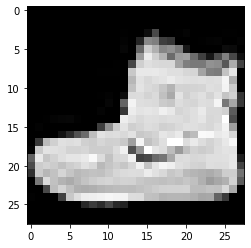

In [16]:
plt.imshow(image.squeeze(), cmap = 'gray')

In [17]:
# Get the first BATCH from train_loader
batch = next(iter(train_loader))
print(len(batch)) # tuple
print(type(batch))

2
<class 'list'>


In [19]:
# Unpack the images and labels
images, labels = batch

In [20]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3])

In [21]:
print(f'Image shape: {images.shape}')
print(f'Label shape: {labels.shape}') # label은 1d tensor

Image shape: torch.Size([32, 1, 28, 28])
Label shape: torch.Size([32])


In [ ]:
# Q5. What does each number in the shape of the images represent?
# As we define batch size is 32, it has 32 images.

# Q6. What about the shape of the labels?
# Since the batch size is 32, it surely has 32 labels.

### View some sample images
- The table for the label index and description is available [HERE](https://github.com/zalandoresearch/fashion-mnist#labels)

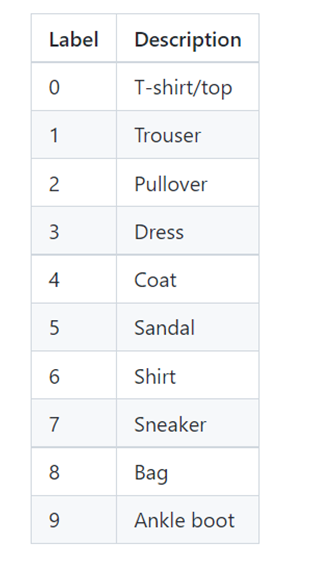

In [22]:
print(f'class labels : {labels}')

class labels : tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3])


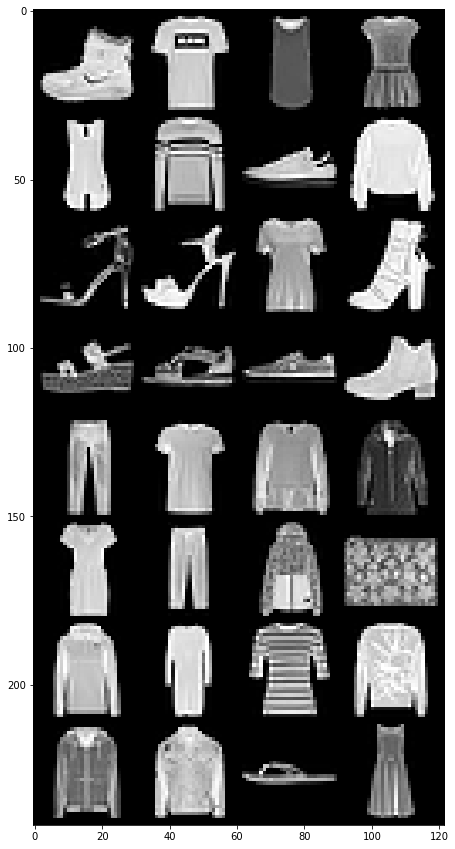

In [23]:

# Create a grid
plt.figure(figsize = (15,15))
grid = torchvision.utils.make_grid(tensor=images, nrow = 4)
# nrow = number of imanges displayed in each row

# Use grid.permute() to transpose the grid so that the axes meet the specifications required by
# plt.imshow(), which are [height, width, channels]. Pytorch dimenstions are [channels, height, width]/
plt.imshow(grid.permute(1,2,0), cmap = 'gray')

#grid.permute?? (1,2,0) -> changing the order!!

In [ ]:
# Note that the images are grayscale (black and white) and have 28x28 pixels
# Grayscale images only have one channel
# TODO: Check that the image labels for each image corresponds to the correct label provided above
# Yes, it matches!

# Q7. How many images are displayed in total here and why? 
# A7. 32 images, because of the batch size is 32.

# Q8. How do you increase or decrease the TOTAL number of images displayed?
# A8. By increasing or decreasing batch size, we can increase/decrease the total number of images displayed.

### 4. Define the Neural Network, Loss and Optimiser

In [28]:
# 4. NN model
class FashionNN(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(hidden_size, num_classes)
    # NOTE: softmax not added here because of CrossEntropyLoss later

  def forward(self, x):
    out = self.layer1(x)
    out = self.relu(out)
    out = self.layer2(out)
    return out

# 4.1 Create NN model instance
model = FashionNN(input_size, hidden_size, num_classes).to(device)

# 4.2 Loss and Optimiser
criterion = nn.CrossEntropyLoss() # will apply softmax
opt = optim.Adam(model.parameters(), lr=learning_rate)

### 5. Training Loop

In [24]:
# 5. Training loop
n_total_steps = len(train_set)
n_iterations = -(-n_total_steps // batch_size)
n_iterations

1875

In [25]:
n_correct = 0
n_samples = 0

In [26]:
# images[0].reshape(1, 784) == images[0].reshape(-1, 784)

In [29]:
for epoch in range(num_epochs):
  print('\n')

  # 5.1 loop over all the batches, i is index, (images, labels) is data
  for i, (images, labels) in enumerate(train_loader):   ## 이 부분 코드 이해해보기! enumerate
      # 5.2 Reshape images first [batch_size, 1, 28, 28] --> [batch_size, 784]
      # 5.3 Push images to GPU
      images = images.reshape(-1, 28*28).to(device)
      labels = labels.to(device)

      # Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      # 5.5 Backward pass
      opt.zero_grad() # 5.6 Empty the values in the gradient attribute, or model.zero_grad()
      loss.backward() # 5.7 Backprop
      opt.step() # 5.8 Update params

      # 5.9 Print loss
      if (i+1) % 200 == 0:
        print(f'(Epoch {epoch+1}/{num_epochs}, iteration {i+1}/{n_iterations}, Loss = {loss.item():.4f}')

      # 5.10 Get Accuracy
      # torch.max() returns actual probability value (ignored) and index or class label (selected)
      _, y_preds = torch.max(outputs,1) # 왜 1이 들어가지? --> dimension이 여러개면 1+1번째 dimension만 바라본다!
      n_samples += labels.shape[0]
      n_correct += (y_preds == labels).sum().item()




(Epoch 1/5, iteration 200/1875, Loss = 0.7617
(Epoch 1/5, iteration 400/1875, Loss = 0.5154
(Epoch 1/5, iteration 600/1875, Loss = 0.4494
(Epoch 1/5, iteration 800/1875, Loss = 0.6882
(Epoch 1/5, iteration 1000/1875, Loss = 0.3607
(Epoch 1/5, iteration 1200/1875, Loss = 0.3535
(Epoch 1/5, iteration 1400/1875, Loss = 0.7484
(Epoch 1/5, iteration 1600/1875, Loss = 0.4497
(Epoch 1/5, iteration 1800/1875, Loss = 0.4188


(Epoch 2/5, iteration 200/1875, Loss = 0.4627
(Epoch 2/5, iteration 400/1875, Loss = 0.3904
(Epoch 2/5, iteration 600/1875, Loss = 0.4021
(Epoch 2/5, iteration 800/1875, Loss = 0.5609
(Epoch 2/5, iteration 1000/1875, Loss = 0.2828
(Epoch 2/5, iteration 1200/1875, Loss = 0.2818
(Epoch 2/5, iteration 1400/1875, Loss = 0.6742
(Epoch 2/5, iteration 1600/1875, Loss = 0.3469
(Epoch 2/5, iteration 1800/1875, Loss = 0.4050


(Epoch 3/5, iteration 200/1875, Loss = 0.3823
(Epoch 3/5, iteration 400/1875, Loss = 0.3620
(Epoch 3/5, iteration 600/1875, Loss = 0.3744
(Epoch 3/5, iterat

In [30]:
# 5.11 Print Accuracy
acc = 100.0 * n_correct / n_samples
print(f'\nTrain Accuracy = {acc:.4f}')


Train Accuracy = 85.0187


### 6. Evaluation

In [31]:
# 6. Deactivate the autograd engine to reduce memory usage and speed up computations (backprop disabled).
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  # 6.1 Loop through test set
  for images, labels in test_loader:
    # 6.2 
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    # 6.3 Run on trained model
    outputs = model(images) 

    # 6.4. Get predictions
    # torch.max() returns actual probability value (ignored) and index or class label (selected)
    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (y_preds == labels).sum().item()

  # 6.5 Print accuracy
  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy = {acc:.4f}')

Test Accuracy = 85.2100


In [32]:
loss

tensor(0.3167, grad_fn=<NllLossBackward0>)

In [33]:
# Q9. What is the final loss of this model on the training set?
# A9. The final loss is 0.4205

# Q10. What is the accuracy of this model on the training set?
# A10. Train Accuracy is 82.8450.
 
# Q11. What is the accuracy of the trained model on the test set?
# A11. Test Accuracy is 84.3000. (Luckly and surprisingly, test accuracy is better.)


### TASK: Increase `num_epochs` & redo
- Keep track of the loss and test set accuracy
- Set `num_epochs=5` in code cell 0 (hyper parameters)
- Rebuild and retrain the model by **running code cells 0, 4, and 5 ONLY**
- Evaluate the model on the test data by running **code cell 6**
- Answer the questions below

In [34]:
loss

tensor(0.3167, grad_fn=<NllLossBackward0>)

In [35]:
# Q12. What is the final loss now and is it less than the previous loss?
# A12. The final loss is 0.2931 and it is less than the one with number of epoch 2.

# Q13. Are the training and test set accuracies higher now?
# A13. Train Accuracy is 85.25, and test accuracy is 85.43. Training accuracy got better and test accuracy got also better.

# Q14. After changing the num_epochs, why should code cell 4 (NN, Loss, Optimiser) be run before code cell 5 (training)?
# A14. We need to recreate the new model. Without running cell 4, then the weights were the old one. 


## 6. Let's add some improvements

We are going to add ONE improvement at a time
- First the training data is **normalised and shuffled** (code provided). Use the same number of epochs as the the previous case to make a fair comparison.
- Build and train the model and get the loss, train and test set accuracies.
- Then change ONE hyper parameter, e.g. `num_epochs`, `hidden_size`, `batch_size`, `learning_rate` OR add layers.
- Run code cells 7-11 to train and test the model and take note of its loss, train and test accuracies.

**IMPORTANT!** If you have trouble running any of the code cells below, restart the runtime, via `Runtime-->Restart runtime` before continuing (or `Ctrl/Cmd + M + .`)


In [ ]:
# You DO NOT have to run this cell code unless you restarted the runtime.

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import torch.optim as optim
import torch.nn as nn

### 7. Normalise and Shuffle the Traning Data

In [36]:
# Add Normalization to transform data

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.0,), (0.5,),)]) # 이부분 숫자가 의미하는 것이 무엇인지?

train_set = torchvision.datasets.FashionMNIST(root = './', download = True,
                                             train= True,
                                             transform = transform)

test_set = torchvision.datasets.FashionMNIST(root = './', download = True,
                                            train = False,
                                            transform = transform)

### 8a. Hyper-parameters

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
# Hyper parameters
input_size = 784 # 28x28
hidden_size1 = 32
hidden_size2 = 128
num_classes = 10 
num_epochs = 10
batch_size = 64
learning_rate = 0.01

### 8b. Shuffle the training data

This reshuffles the data at every epoch


In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, shuffle = False)

### 9. NN Model, Loss, Optimiser

In [ ]:
# 9. NN model
class FashionNN2(nn.Module):
  def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size1)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(hidden_size1, hidden_size2)
    self.layer3 = nn.Linear(hidden_size2, num_classes)
    # NOTE: softmax not added here because of CrossEntropyLoss later

  def forward(self, x):
    out = self.layer1(x)
    out = self.relu(out)
    out = self.layer2(out)
    out = self.relu(out)
    out = self.layer3(out)
    return out

# 9.1 Create NN model instance
model = FashionNN2(input_size, hidden_size1, hidden_size2, num_classes).to(device)

# 9.2 Loss and Optimiser
criterion = nn.CrossEntropyLoss() # will apply softmax
opt = optim.Adam(model.parameters(), lr=learning_rate)

### 10. Training Loop

In [ ]:
# 10. Training loop
n_total_steps = len(train_set)
n_iterations = -(-n_total_steps // batch_size) # ceiling division

n_correct = 0
n_samples = 0

for epoch in range(num_epochs):
  print('\n')
  # 10.1 loop over all the batches, i is index, (images, labels) is data
  for i, (images, labels) in enumerate(train_loader):
    # 10.2 Reshape images first [batch_size, 1, 28, 28] --> [batch_size, 784]
    # 10.3 Push images to GPU
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # 10.4 Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # 10.5 Backward pass
    opt.zero_grad() 
    loss.backward() 
    opt.step() 

    # 10.6 Print loss
    if (i+1) % 200 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, Iteration {i+1}/{n_iterations}, Loss={loss.item():.4f} ')

    # 10.7 Get model Accuracy
    # torch.max() returns actual probability value (ignored) and index of class label (selected)
    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (y_preds == labels).sum().item()

# 10.8 Print accuracy
acc = 100.0 * n_correct / n_samples
print(f'Finished training \nTrain Accuracy = {acc:.4f}')




Epoch 1/10, Iteration 200/938, Loss=0.3708 
Epoch 1/10, Iteration 400/938, Loss=0.5930 
Epoch 1/10, Iteration 600/938, Loss=0.4340 
Epoch 1/10, Iteration 800/938, Loss=0.5850 


Epoch 2/10, Iteration 200/938, Loss=0.2694 
Epoch 2/10, Iteration 400/938, Loss=0.3211 
Epoch 2/10, Iteration 600/938, Loss=0.5933 
Epoch 2/10, Iteration 800/938, Loss=0.3106 


Epoch 3/10, Iteration 200/938, Loss=0.2394 
Epoch 3/10, Iteration 400/938, Loss=0.4891 
Epoch 3/10, Iteration 600/938, Loss=0.4672 
Epoch 3/10, Iteration 800/938, Loss=0.5807 


Epoch 4/10, Iteration 200/938, Loss=0.5138 
Epoch 4/10, Iteration 400/938, Loss=0.6554 
Epoch 4/10, Iteration 600/938, Loss=0.4163 
Epoch 4/10, Iteration 800/938, Loss=0.3500 


Epoch 5/10, Iteration 200/938, Loss=0.3213 
Epoch 5/10, Iteration 400/938, Loss=0.2446 
Epoch 5/10, Iteration 600/938, Loss=0.4534 
Epoch 5/10, Iteration 800/938, Loss=0.4457 


Epoch 6/10, Iteration 200/938, Loss=0.4980 
Epoch 6/10, Iteration 400/938, Loss=0.5947 
Epoch 6/10, Iteratio

### 11. Evaluation on Test Set

In [ ]:
# 11. Deactivate the autograd engine to reduce memory usage and speed up computations (backprop disabled).
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  # 11.1 Loop through test set
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images) 

    # 11.2 Get predictions
    # torch.max() returns actual probability value (ignored) and index or class label (selected)
    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (y_preds == labels).sum().item()

  # 11.3 Print accuracy
  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy = {acc:.4f}')


Test Accuracy = 84.8100


In [ ]:
loss

tensor(0.3079, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
# Q15. What is the final loss of this model on the training set?
# A15. In this case, the final loss was 0.4665 which is slightly higher than the first try without normalization and shuffling.

# Q16. What is the accuracy of this model on the training set?
# A16. It is 83.62.

# Q17. What is the accuracy of the trained model on the test set?
# A17. It is 84.47.

# Q18. Did shuffling and normalisation help to build a better model?
# A.18 I assume it would help and the accuracy got a little bit better than the model without normalizaion and shuffling.
# I think the reason why it did not show obvious improvement is that the number of epoch is too small so the model have not trained enough yet.

# Q19. How many training samples were seen by the model during each epoch of training?
# A19. Batch size is 32 so every iteration, 32 samples were seen by the model. But one epoch means that the model sees the whole training data,
# therefore, each epoch, the model will see 60,000 samples(the whole sample).

### Further Improvement

- Try changing other hyper parameters, ONE at a time while keeping everything else the same
- **KEEP shuffling and normalisation**, i.e. do not change code cells 7 and 8b.
- Example changes:
  - Increase `num_epochs` (max 20)
  - Change number neurons in hidden layers (keep it within 128 max per layer)
  - Add ONE extra hidden layer at a time (start with 32 units). You only need to run code cells 9-11.
  - Change `batch_size` (to powers of 2s), try 64.
  - Change loss to NLLLoss(), you need to add softmax activation in the output layer
  - Change the learning rate

- Rerun **code cells 8a-11**(except when adding layers, where you would rerun just cells 9-11).
- If the change improves the model, KEEP this improvement and change something else and redo to see if it can be further improved.
- Keep a record of the final loss, train and test set accuracies for each test run.
- Make at LEAST THREE changes that help improve the model's performance on the test set.


In [ ]:
loss

tensor(0.4472, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
# Test 1 
# Change : Number of epochs 5 --> 20
# Loss: 0.2004
# Train acc: 91.6067
# Test acc: 86.7700(better than the previous model)

In [ ]:
# Test 2 
# Change: Add one more hidden layer. and increase the number of neurons in second hidden layer(first hidden layer : 32, second hidden layer 128)
# Loss: 0.1008
# Train acc: 87.5172
# Test acc: 87.3300(better than the previous model)

In [ ]:
# Test 3
# Change: Change the learning rate from 0.001 to 0.01
# Loss: 0.1553
# Train acc: 90.7872
# Test acc: 86.5300(worse than the previous model)

In [ ]:
# Test 4
# Change: Increase batch size to 64
# Loss: 0.4472
# Train acc: 85.1120
# Test acc: 84.8100(worse than the previous model)

In [ ]:
# Q20. State any insights you gained from this exercise.
# A20. At first, I assumed that the number of epochs(original model) 2 or 5 was too small, so I increased it to see if the model can run over epochs.
# It shows better performance with higher number of epochs. I learned that we need to be sure if the number of epochs are large enough for the model to learn.
# After training the model, we can draw the error curve and if we think the epoch number is too large, then we can decrease it then.
# Also, complicated model can learn better. It cannot be applied everytime, but the higher layers with more nodes led performance improvement in this case.
# There is no need to construct too complicated model for a simple task, so we need to find the right structure by redoing it over time.
# The loss is gradually decreasing but sometimes there were small jumps. 
# Also, it seems that loss and training accuracy does not go to the same direction. I assumed the opposite way, so I will ask this one to professor next time.
